In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'February 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12
2018-02-28     2527   1625         44    7   0     3    121     130      16

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-02-28       50   -256         12   2   0     2     47      -6       4

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

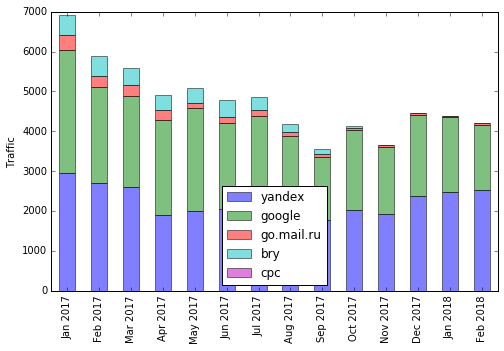

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

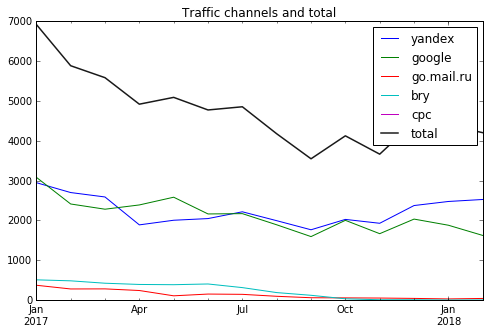

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                np - /      1
           1                                       куплю шпон дуба      1
go.mail.ru 0                                             (not set)     44
google     0                             np - /?cnt=catalog&r=2438    110
           1                                                np - /    103
           2                             np - /?cnt=catalog&r=1428     83
           3                                      np - /?pid=pokaz     56
           4                                         полотно двери     47
           5                               np - /?pid=menu-katalog      8
           6                              np - /?cnt=catalog&r=999      7
           7                             np - /?cnt=catalog&r=2501      5
           8                                    np - /?pid=contact      4
           9                             np - /?cnt=catalog&r=1010      3
           10                            np - /?cnt=catalog&r=1404      3
           11                            np - /?cnt=catalog&r=2966      3
           12                            np - /?cnt=catalog&r=3124      3
           13                             np - /?cnt=catalog&r=756      3
           14                                 полотно двери купить      3
           15                            np - /?cnt=catalog&r=1458      2
           16                            np - /?cnt=catalog&r=1792      2
           17                            np - /?cnt=catalog&r=2047      2
           18                            np - /?cnt=catalog&r=2553      2
           19                             np - /?cnt=catalog&r=300      2
           20                             np - /?cnt=catalog&r=448      2
           21                             np - /?cnt=catalog&r=513      2
           22                             np - /?cnt=catalog&r=763      2
           23                                      полотна дверные      2
           24                                    полотно для двери      2
           25                            np - /?cnt=catalog&r=1011      1
           26                            np - /?cnt=catalog&r=1017      1
...                                                            ...    ...
yandex     1851                           стекла на кухонные двери      1
           1852                            стекло в дверь кухонную      1
           1853                            стекло в дверь на кухню      1
           1854                    стекло для двери в кухню купить      1
           1855                           стекло на дверь на кухню      1
           1856                          стеклянная дверь на кухню      1
           1857                   стеклянная дверь на кухню купить      1
           1858                     стеклянная дверь на кухню фото      1
           1859                стеклянная дверь на кухню фото цена      1
           1860                  стеклянное дверное полотно купить      1
           1861                       стеклянное полотно для двери      1
           1862                         стеклянные двери для кухни      1
           1863                    стеклянные двери для кухни фото      1
           1864                  стеклярус на дверной проем купить      1
           1865                        стеллаж с дверцами на кухню      1
           1866                         стильные белые двери эмаль      1
           1867  стоимость блок дверной одинарный деревянный гл...      1
           1868                 столплит петли для кухонных дверей      1
           1869  тамбурные рамы блоки с одной распашной двуполь...      1
           1870                       телевизор в кухне над дверью      1
           1871                  телевизор над дверью в кухне фото      1
           1872                  технология печати дверных полотен      1
           1873       технология производства эмалированных две

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,np - /,1
go.mail.ru,(not set),44
google,np - /?cnt=catalog&r=2438,110
rambler,межкомнатные двери под ключ,1
yahoo,np - /?cnt=catalog&r=2438,1
yandex,(not set),440


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                           np - /      1
           1                  куплю шпон дуба      1
go.mail.ru 0                        (not set)     44
google     0        np - /?cnt=catalog&r=2438    110
           1                           np - /    103
           2        np - /?cnt=catalog&r=1428     83
           3                 np - /?pid=pokaz     56
           4                    полотно двери     47
rambler    0      межкомнатные двери под ключ      1
           1        установка дверей под ключ      1
yahoo      0        np - /?cnt=catalog&r=2438      1
           1          np - /?pid=menu-katalog      1
           2                 np - /?pid=pokaz      1
yandex     0                        (not set)    440
           1    двери межкомнатные в томилино      3
           2  интернет-магазин дверей тук-тук      3
           3             тук-тук двери москва      2
           4                  took-took двери      1